In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model

# importing necassary libraries

In [2]:
df = pd.read_csv("house_prices_1.csv")
df
# reading the data

,area,price
0,1567,177067.50
1,3345,511748.20
2,3722,404096.67
3,2783,357916.31
4,2949,362409.54
...,...,...
995,3442,434336.51
996,1530,211400.14
997,2102,172513.03
998,1551,200701.84


In [3]:

df.dtypes
# checking the data types of the columns

area       int64
price    float64
dtype: object

Text(0, 0.5, 'Price (in $)')

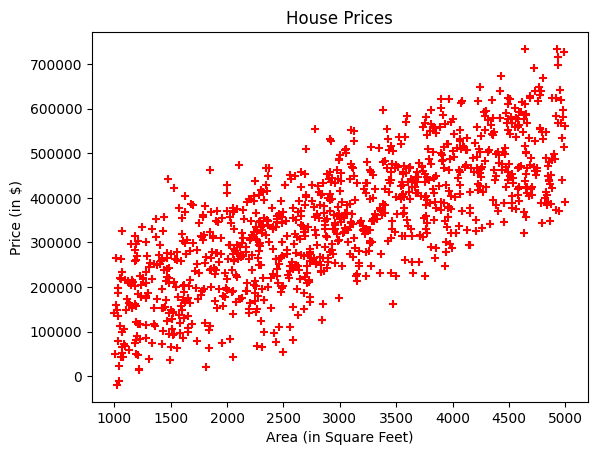

In [4]:
plt.scatter(df["area"], df["price"], color="red", marker="+")
plt.title("House Prices")
plt.xlabel("Area (in Square Feet)")
plt.ylabel("Price (in $)")

In [5]:
reg_obj = linear_model.LinearRegression()
reg_obj.fit(df[["area"]], df["price"])

LinearRegression()

In [6]:
df2 = pd.DataFrame({"area": df["area"]})
df2

,area
0,1567
1,3345
2,3722
3,2783
4,2949
...,...
995,3442
996,1530
997,2102
998,1551


In [7]:
predicted_arr = reg_obj.predict(df2)

print(predicted_arr[:10], end=", ")
print("...", end=", ")
print(predicted_arr[-10:])

[212322.90487091 384074.21961441 420491.68061458 329786.12125342
 345821.39585827 405712.18052698 266417.80715232 360600.89594587
 484342.98491461 276657.19936988], ..., [378857.92546585 212709.29703006 416724.35706284 393251.0333943
 468597.50442913 393444.22947387 208748.77739874 264002.85615762
 210777.33623429 470915.85738405]


In [10]:
w = reg_obj.coef_ # ouputs the value of slope/weight (w)
w

array([96.59803979])

In [11]:
b = reg_obj.intercept_ # outputs the value of intercept/bias (b)
b 

60953.776522719534

In [12]:
x = df2.to_numpy(df["area"])

In [ ]:
# y' = w * x + b

using_formula_arr = np.empty(1000)
for i in range(len(x)):
    using_formula_arr[i] = w * x[i] + b
#     print(w * x[i] + b, end=", ")

print(using_formula_arr[:10], end=", ")
print("...", end=", ")
print(using_formula_arr[-10:])

[212322.90487091 384074.21961441 420491.68061458 329786.12125342
 345821.39585827 405712.18052698 266417.80715232 360600.89594587
 484342.98491461 276657.19936988], ..., [378857.92546585 212709.29703006 416724.35706284 393251.0333943
 468597.50442913 393444.22947387 208748.77739874 264002.85615762
 210777.33623429 470915.85738405]


C:\Users\DELL\AppData\Local\Temp\ipykernel_17788\3950902830.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  using_formula_arr[i] = w * x[i] + b


In [14]:
np.array_equal(predicted_arr, using_formula_arr)

True

In [15]:
df["predicted_price"] = predicted_arr
display(df)

,area,price,predicted_price
0,1567,177067.50,212322.904871
1,3345,511748.20,384074.219614
2,3722,404096.67,420491.680615
3,2783,357916.31,329786.121253
4,2949,362409.54,345821.395858
...,...,...,...
995,3442,434336.51,393444.229474
996,1530,211400.14,208748.777399
997,2102,172513.03,264002.856158
998,1551,200701.84,210777.336234


Text(0, 0.5, 'Price (in $)')

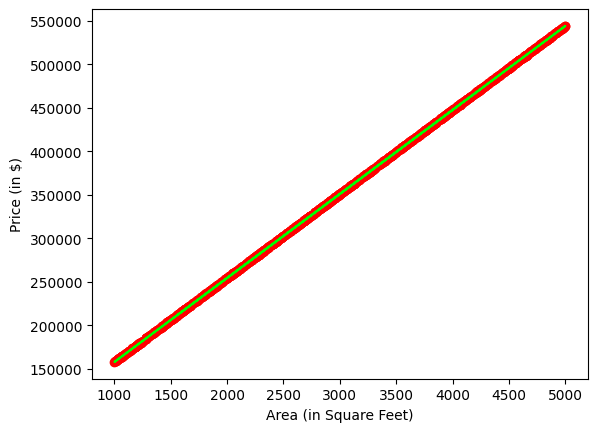

In [21]:
plt.plot(df["area"], df["predicted_price"], color="lime")
plt.scatter(df["area"], df["predicted_price"], color="red")

plt.xlabel("Area (in Square Feet)")
plt.ylabel("Price (in $)")

Text(0, 0.5, 'Price (in $)')

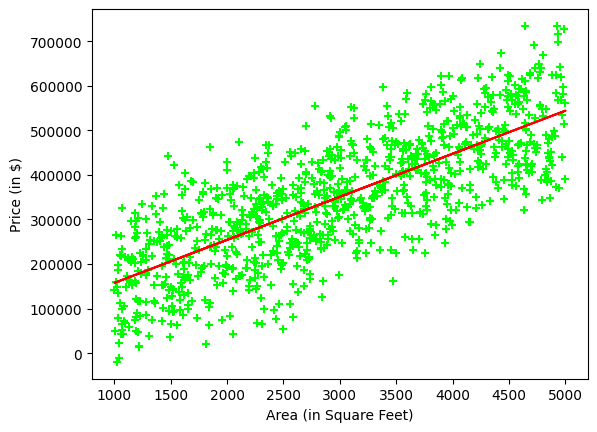

In [16]:
plt.scatter(df["area"], df["price"], color="lime", marker="+")
plt.plot(df["area"], df["predicted_price"], color="red")

plt.xlabel("Area (in Square Feet)")
plt.ylabel("Price (in $)")

In [17]:
display(df)
print(df.dtypes)

,area,price,predicted_price
0,1567,177067.50,212322.904871
1,3345,511748.20,384074.219614
2,3722,404096.67,420491.680615
3,2783,357916.31,329786.121253
4,2949,362409.54,345821.395858
...,...,...,...
995,3442,434336.51,393444.229474
996,1530,211400.14,208748.777399
997,2102,172513.03,264002.856158
998,1551,200701.84,210777.336234


area                 int64
price              float64
predicted_price    float64
dtype: object


In [19]:
def predict_price(area):
    """
    Predicts the price of a house based on the given area.
    
    Parameters:
        area (float or int): The area of the house in square feet.
    
    Returns:
        float: The predicted price of the house.
    """
    price = reg_obj.predict([[area]])[0]  # Predict price using trained model
    print(f"Predicted price for {area} square feet: ${price:,.2f}")
    return price

# Example usage
predict_price(5000)


Predicted price for 5000 square feet: $543,943.98


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


543943.9754639633